In [36]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim

In [37]:
transform = transforms.ToTensor()

In [38]:
train_data = datasets.MNIST(root='data', train=True, download =True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download =True, transform=transform)

In [39]:
train_loader  =DataLoader(train_data, batch_size=32, shuffle =True)
test_loader  =DataLoader(test_data, batch_size=32, shuffle =True)

In [40]:
images, labels = next(iter(train_loader))

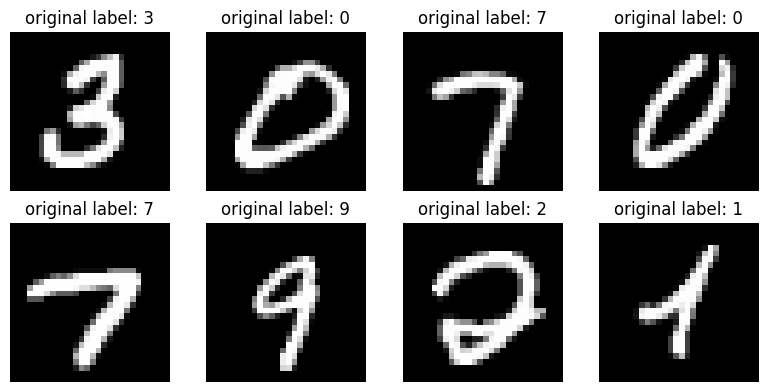

In [41]:
plt.figure(figsize = (8,4))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(images[i].squeeze(), cmap='grey')
    plt.title(f"original label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [50]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 392),
            nn.ReLU(),
            nn.Linear(392, 196),
            nn.ReLU(),
            nn.Linear(196,98),
            nn.ReLU(),
            nn.Linear(98,10)
        )
    def forward(self,x):
        return self.net(x)

In [51]:
model = MLP()
print(model)

MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=392, bias=True)
    (2): ReLU()
    (3): Linear(in_features=392, out_features=196, bias=True)
    (4): ReLU()
    (5): Linear(in_features=196, out_features=98, bias=True)
    (6): ReLU()
    (7): Linear(in_features=98, out_features=10, bias=True)
  )
)


In [52]:
images, labels = next(iter(train_loader))

In [53]:
outputs =model(images)

In [54]:
print("output shape:", outputs.shape)
print("sample output (logits):") 
print(outputs[0])

output shape: torch.Size([32, 10])
sample output (logits):
tensor([-0.1247, -0.0285,  0.0084,  0.0637, -0.0843, -0.0259,  0.0242,  0.0534,
        -0.0599,  0.0289], grad_fn=<SelectBackward0>)


In [55]:
predicted = torch.argmax(outputs, dim=1)
print("predicted:", predicted[:5].tolist())
print("actual:", labels[:5].tolist())

predicted: [3, 7, 3, 7, 7]
actual: [7, 6, 1, 7, 6]


In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 6
for epoch in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model.train()
    for images, labels in train_loader:
        # forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # backpropagation
        optimizer.zero_grad()     # Clear previous gradients
        loss.backward()           # Compute new gradients
        optimizer.step()          # Update weights

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1 - Loss: 0.0328, Accuracy: 99.01%
Epoch 2 - Loss: 0.0289, Accuracy: 99.11%
Epoch 3 - Loss: 0.0245, Accuracy: 99.21%
Epoch 4 - Loss: 0.0233, Accuracy: 99.27%


In [15]:
model.eval()
correct = 0 
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
print(f"test accuracy: {100 * correct /total:.2f}%")

test accuracy: 97.42%
